In [51]:
from sys import argv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

In [61]:
data = np.transpose(np.loadtxt('data/simple/calibracion_1ms.dat', delimiter=' '))

In [68]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return  poisson.pmf(k, lamb)

def poisson_(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


No handles with labels found to put in legend.


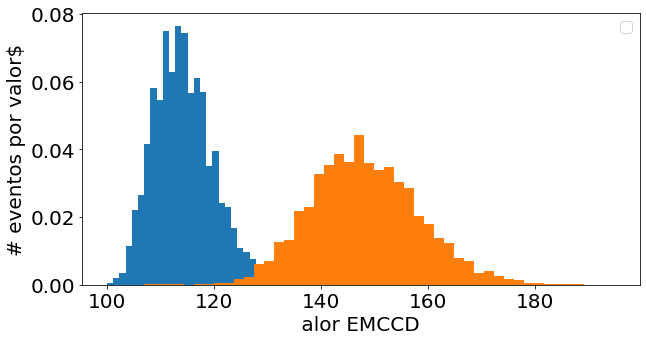

In [106]:
plt.figure(figsize=(10,5))
entries, bin_edges, patches = plt.hist(data[0],bins=int(max(data[0])/4),density=True)
entries, bin_edges, patches = plt.hist(data[1],bins=int(max(data[1])/4),density=True)
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()

C:\Users\Luna\anaconda3.2\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


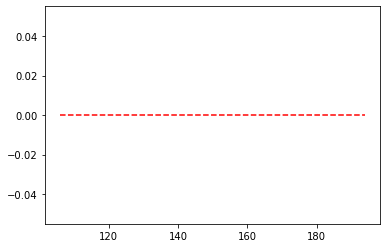

In [104]:
# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1]) 

# fit with curve_fit
param, param_cov = curve_fit(fit_function,bin_middles,entries, p0=[np.var(entries)])

plt.plot(bin_middles,fit_function(bin_middles, param), color = 'red', ls='dashed')